In [6]:
import yfinance as yf
import pandas as pd
import ta

In [7]:
df=yf.download('^GSPC',start='2010-01-01',end='2025-07-29')
df

C:\Users\user\AppData\Local\Temp\ipykernel_11676\895444883.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download('^GSPC',start='2010-01-01',end='2025-07-29')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2010-01-04,1132.989990,1133.869995,1116.560059,1116.560059,3991400000
2010-01-05,1136.520020,1136.630005,1129.660034,1132.660034,2491020000
2010-01-06,1137.140015,1139.189941,1133.949951,1135.709961,4972660000
2010-01-07,1141.689941,1142.459961,1131.319946,1136.270020,5270680000
2010-01-08,1144.979980,1145.390015,1136.219971,1140.520020,4389590000
...,...,...,...,...,...
2025-07-22,6309.620117,6316.120117,6281.709961,6306.600098,5662040000
2025-07-23,6358.910156,6360.640137,6317.490234,6326.899902,5642510000


In [8]:
df.columns = [col[0] if isinstance(col, tuple) else col for col in df.columns]
df.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [9]:
df['200_d_high']=df.High.rolling(200).max()
df['10_d_low']=df.Low.rolling(10).min()
df

,Close,High,Low,Open,Volume,200_d_high,10_d_low
Date,,,,,,,
2010-01-04,1132.989990,1133.869995,1116.560059,1116.560059,3991400000,NaN,NaN
2010-01-05,1136.520020,1136.630005,1129.660034,1132.660034,2491020000,NaN,NaN
2010-01-06,1137.140015,1139.189941,1133.949951,1135.709961,4972660000,NaN,NaN
2010-01-07,1141.689941,1142.459961,1131.319946,1136.270020,5270680000,NaN,NaN
2010-01-08,1144.979980,1145.390015,1136.219971,1140.520020,4389590000,NaN,NaN
...,...,...,...,...,...,...,...
2025-07-22,6309.620117,6316.120117,6281.709961,6306.600098,5662040000,6336.080078,6201.589844
2025-07-23,6358.910156,6360.640137,6317.490234,6326.899902,5642510000,6360.640137,6201.589844
2025-07-24,6363.350098,6381.310059,6360.569824,6368.600098,5282720000,6381.310059,6201.589844


In [10]:
df['atr']=ta.volatility.average_true_range(high=df.High,low=df.Low,close=df.Close)


In [11]:
df['price']=df.Open.shift(-1)
df.dropna(inplace=True)
df

,Close,High,Low,Open,Volume,200_d_high,10_d_low,atr,price
Date,,,,,,,,,
2010-10-18,1184.709961,1185.530029,1174.550049,1176.829956,4450050000,1219.800049,1140.680054,13.795537,1178.640015
2010-10-19,1165.900024,1178.640015,1159.709961,1178.640015,5600120000,1219.800049,1151.410034,14.595856,1166.739990
2010-10-20,1178.170044,1182.939941,1166.739990,1166.739990,5027880000,1219.800049,1151.410034,14.770431,1179.819946
2010-10-21,1180.260010,1189.430054,1171.170044,1179.819946,4625470000,1219.800049,1155.579956,15.019687,1180.520020
2010-10-22,1183.079956,1183.930054,1178.989990,1180.520020,3177890000,1219.800049,1155.709961,14.299714,1184.739990
...,...,...,...,...,...,...,...,...,...
2025-07-21,6305.600098,6336.080078,6303.790039,6304.740234,5010840000,6336.080078,6201.589844,51.789038,6306.600098
2025-07-22,6309.620117,6316.120117,6281.709961,6306.600098,5662040000,6336.080078,6201.589844,50.547689,6326.899902
2025-07-23,6358.910156,6360.640137,6317.490234,6326.899902,5642510000,6360.640137,6201.589844,50.581427,6368.600098


In [12]:
in_position=False
profits=[]
for index,row in df.iterrows():
    if not in_position and row.High>=row['200_d_high']:
        buyprice=row.price,
        sl=buyprice-row.atr*2,
        in_position=True
        
    if in_position:
        if row.Low<=sl or row.Low<=row['10_d_low']:
            #print(row.price)
            sellprice=row.price
            profit=(sellprice-buyprice)/buyprice
            profits.append(float(profit))
            in_position=False

C:\Users\user\AppData\Local\Temp\ipykernel_11676\1367762759.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  profits.append(float(profit))


In [13]:
profits

[-0.03510481234137706,
 0.06699477966120611,
 -0.006073777022414395,
 -0.01309851195136199,
 -0.009864177042578007,
 -0.009213864542369566,
 0.0,
 -0.003171288009337625,
 0.014497514083070954,
 0.008747926900037737,
 -0.017212691651933263,
 0.021382686654751654,
 0.004584396617635593,
 -0.014322594697000481,
 0.006708061524360714,
 -0.002675652520684336,
 -0.0008558019859025707,
 -0.01137994762309715,
 -0.0011798998033236059,
 -0.013673318860488342,
 0.009431066034446869,
 -0.0021027509071498,
 -0.01460696590553606,
 0.021356203003648648,
 -0.02932916144770791,
 -0.011552739147988836,
 -0.015543396029756776,
 -0.008833294524437395,
 -0.017068153821619986,
 0.011769879831988113,
 -0.006214084102049028,
 0.022733901186458908,
 0.030528771425886902,
 -0.01952470256805212,
 0.006088196799285566,
 -0.007505574684895304,
 0.002867065825822545,
 0.02263719007482665,
 -0.0018621079732809621,
 0.05412816042257581,
 0.014522961971188575,
 -0.008208619324593066,
 0.009350768543859505,
 0.02243866

In [14]:
(pd.Series(profits)+1).cumprod()#.plot()

0     0.964895
1     1.029538
2     1.023285
3     1.009881
4     0.999920
        ...   
62    1.342276
63    1.351438
64    1.343598
65    1.326311
66    1.297037
Length: 67, dtype: float64

<Axes: >

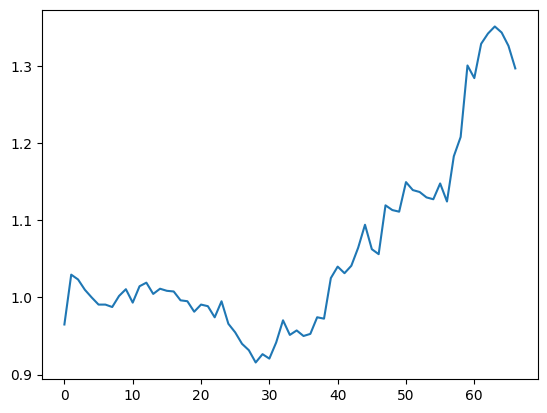

In [15]:
(pd.Series(profits)+1).cumprod().plot()

<Axes: xlabel='Date'>

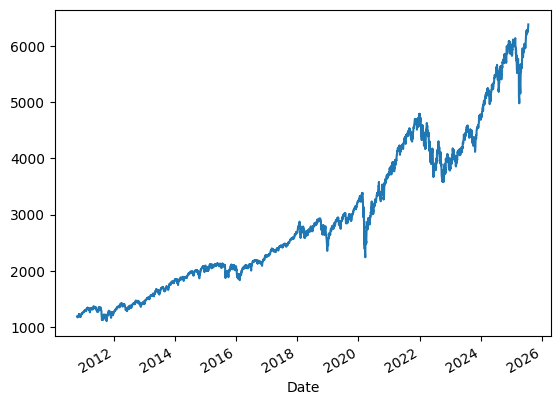

In [16]:
df['Close'].plot()